## <center>Elements Of Data Science - F2020</center>
# <center>Week 6: Intro to Machine Learning Models Continued<center>
### <center>10/18/2020</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LinearRegression

sns.set_style('darkgrid')
%matplotlib inline

# TODOs

- Readings:
 - Recommended: https://scikit-learn.org/stable/supervised_learning.html
 - Reference: PML Chapter Chap 3
    
- Answer and submit Quiz 6

- HW1, Due Thurs Oct 22nd, 11:59pm ET

- Midterm, next week

# Today

- Finish Linear Models
- One Vs. Rest For Multiclass/Multilabel Classification
- Distance Based: kNN
- Tree Based: Decision Tree
- Ensembles: Bagging, Boosting, Stacking

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Linear Models

- Linear Regression
- Logistic Regression
- SVM

# Wine as Multi-Class Classification

In [2]:
df_wine = pd.read_csv('../data/wine_dataset.csv',usecols=['alcohol','ash','proline','hue','class'])

X = df_wine[['proline','hue']]
y = df_wine['class']

zscore = lambda x: (x-x.mean()) / x.std()

X_zscore = X.apply(zscore,axis=0)
alcohol_zscore = zscore(df_wine.alcohol)

y.value_counts().sort_index()

0    59
1    71
2    48
Name: class, dtype: int64

# One Vs. Rest (OvR) Classification For Multiclass, Multilabel

- Can use any binary classifier for Multiclass/Multilabel classification by training multiple models:

 - model 1 : class 1 vs (class 2 and class 3)
 - model 2 : class 2 vs (class 1 and class 3)
 - model 3 : class 3 vs (class 1 and class 2)
<br>
<br>

- For Multiclass
 - Predict $\hat{y}$ using the model with highest $P(y=\hat{y}\mid x)$, or distance from boundary, or ...
<br>
<br>

- For Multilabel
 - Predict $\hat{y}$ for any model that predicts a value above some threshold
<br>
<br>
 
See [sklearn](https://scikit-learn.org/stable/modules/multiclass.html) for more info and other methods

# OvR For Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(multi_class='ovr', # default
                          max_iter=1000      # to avoid errors
                         )
logr.fit(X_zscore,y)

print(logr.predict(X_zscore.iloc[[15,82,166]]))
print(logr.predict_proba(X_zscore.iloc[[15,82,166]]))

[0 1 2]
[[9.67392098e-01 3.14881014e-02 1.11980048e-03]
 [1.46331313e-01 8.53010324e-01 6.58362811e-04]
 [1.75637296e-01 3.44369368e-01 4.79993336e-01]]


Text(0, 0.5, 'hue')

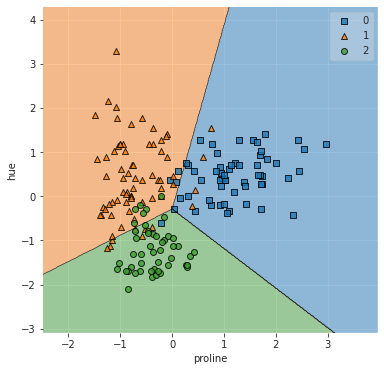

In [4]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X_zscore.values,y.values,logr)
ax.set_xlabel(X.columns[0]); ax.set_ylabel(X.columns[1])

# Distance Based: k-Nearest Neighbor (kNN)
<br>
- What category do most of the $k$ nearest neighbors belong to?
<br>
<br>
<br>
<div align="center"><img src="images/knn_classifier.png" width="600px"></div>

From PML

# KNN in sklearn

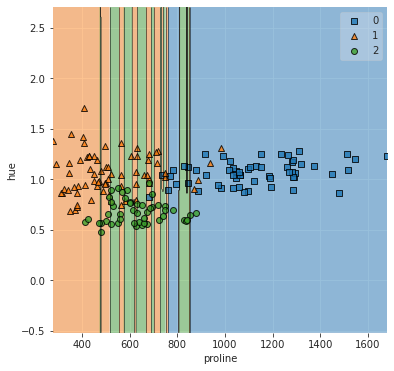

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X.values, y.values, clf=knn);
ax.set_xlabel(X.columns[0]); ax.set_ylabel(X.columns[1]);

# Effects of Standardization on Distance Based Methods

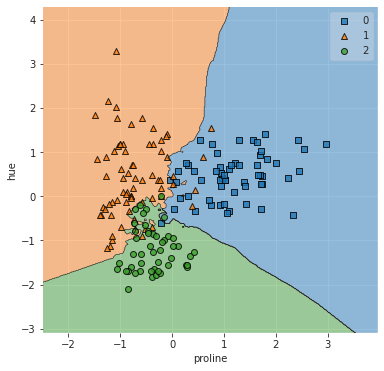

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_zscore,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X_zscore.values, y.values, clf=knn);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);

# Curse of Dimensionality
<br>
<br>


The more dimensions, the further away things can be.

In [7]:
x1 = np.array([0,0])
x2 = np.array([1,1])
(((x1 - x2)**2).sum())**.5

1.4142135623730951

In [8]:
x1 = np.array([0,0])
x2 = np.array([0,1])
(((x1 - x2)**2).sum())**.5

1.0

In [9]:
x1,x2 = np.zeros(1000),np.ones(1000)
(((x1 - x2)**2).sum())**.5

31.622776601683793

In [10]:
x2[0] = 0
(((x1 - x2)**2).sum())**.5

31.606961258558215

# Regression with kNN

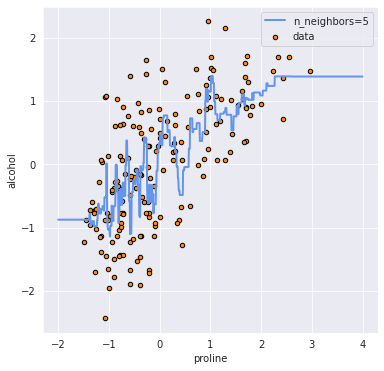

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_zscore.proline.values.reshape(-1,1),alcohol_zscore)
X_test = np.linspace(-2,4,1000).reshape(-1,1)
y_hat = knnr.predict(X_test)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(X_zscore.proline, alcohol_zscore, s=20, edgecolor="black",
            c="darkorange", label="data")
ax.plot(X_test, y_hat, color="cornflowerblue",
         label="n_neighbors=5", linewidth=2)
ax.set_xlabel('proline'); ax.set_ylabel('alcohol'); ax.legend();

# Decision Tree

- What answer does a series of yes/no questions lead us to?
<br>
<br>

<div align="center"><img src="images/decisiontree_smallexample.png" width="600px"></div>

From PML

# Decision Tree Classifier in sklearn

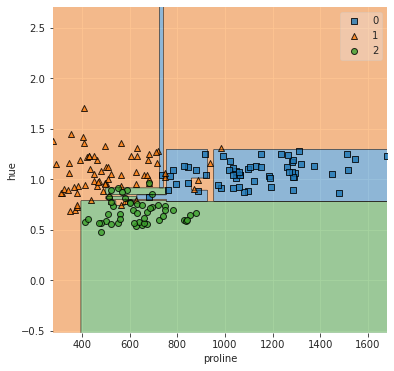

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X.values, y.values, clf=dtc);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);

# Building a Decision Tree
<br>

- How to decide which question to choose? **Reduce Impurity**

<div align="center"><img src="images/decisiontree_impurity.png"></div>

From PML

In [13]:
df = pd.DataFrame([[0,.2,0],[0,.7,0],[1,.7,1]],columns=['feature1','feature2','target'])
display(df)

# Is feature1 equal to 0?
print(df[df.feature1 == 0].target.values)
print(df[df.feature1 != 0].target.values)
print()

# Is feature2 <= .2?
print(df[df.feature2 <= .2].target.values)
print(df[df.feature2 >  .2].target.values)

,feature1,feature2,target
0,0,0.2,0
1,0,0.7,0
2,1,0.7,1


[0 0]
[1]

[0]
[0 1]


# Plot Learned Decision Tree Using sklearn

```python
# Note: there is a conflict between plot_tree and seaborn.set_style in sklearn < .24
from sklearn.tree import plot_tree
# for tree with maxdepth=10
plot_tree(dtc,ax=ax,fontsize=8,feature_names=X.columns,filled=True);
```
<div align="center"><img src="images/dt_wine_plot_maxdepth10.png"></div>

# Decision Tree: Limit Maximum Depth

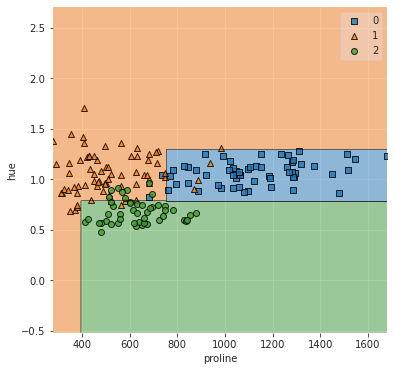

In [14]:
dtc_md3 = DecisionTreeClassifier(max_depth=3)
dtc_md3.fit(X,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X.values, y.values, clf=dtc_md3);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);

# Plot Learned Decision Tree Using sklearn
<br>
- For tree with max_depth=3

<div align="center"><img src="images/dt_wine_plot_maxdepth3.png"></div>

# Regression with Decision Trees

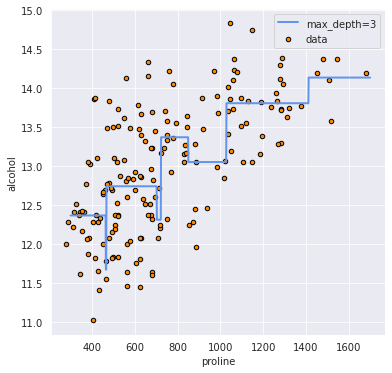

In [15]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X.proline.values.reshape(-1,1),df_wine.alcohol)
X_test = np.linspace(300,1700,1000)[:,np.newaxis]
y_hat = dtr.predict(X_test)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(X.proline, df_wine.alcohol, s=20, edgecolor="black",
            c="darkorange", label="data")
ax.plot(X_test, y_hat, color="cornflowerblue",
         label="max_depth=3", linewidth=2)
ax.set_xlabel('proline'); ax.set_ylabel('alcohol'); plt.legend();

# Ensemble Methods
<br>

- "Wisdom of the crowd"
- Can often achieve better performance with collection of learners
- Often use shallow trees as base learners

Common methods for generating ensembles:
<br>

- **Bagging** (Bootstrap Aggregation)
 - Random Forest
- **Boosting**
 - Gradient Boosting
- **Stacking**

# Random Forest and Gradient Boosted Trees
<br>

<div align="center"><img src="images/Architecture-of-the-random-forest-model.png" width="1000px"></div>

<font size=4>From https://www.researchgate.net/publication/301638643_Electromyographic_Patterns_during_Golf_Swing_Activation_Sequence_Profiling_and_Prediction_of_Shot_Effectiveness</font>

# Bagging with Random Forests
<br>

- Trees built with bootstrap samples and subsets of features
- Achieve variation with random selection of observations and features
<br>
<br>

<div align="center"><img src="images/bagging.png" width="700px"></div>

From PML

# Random Forests with sklearn

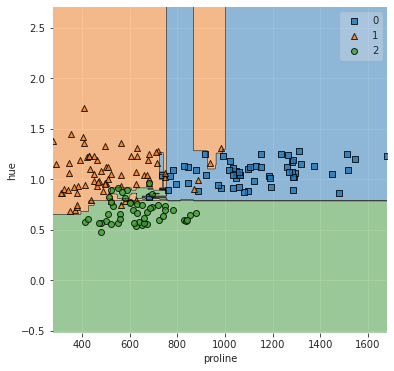

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, # number of trees in ensemble
                             n_jobs=-1,       # parallelize using all available cores
                             random_state=0  # for demonstration only
                            )
rfc.fit(X,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X.values, y.values, clf=rfc);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);

# Regression with RandomForests

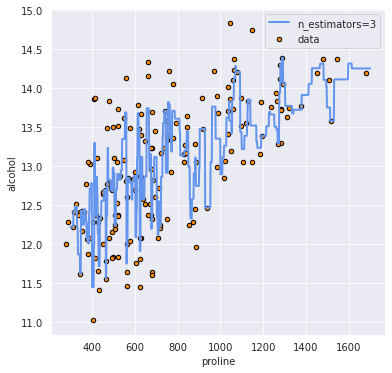

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=3, n_jobs=-1)
rfr.fit(df_wine.proline.values.reshape(-1,1),df_wine.alcohol)
X_test = np.linspace(300,1700,1000)[:,np.newaxis]
y_hat = rfr.predict(X_test)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(df_wine.proline, df_wine.alcohol, s=20, edgecolor="black",
            c="darkorange", label="data")
ax.plot(X_test, y_hat, color="cornflowerblue",
         label="n_estimators=3", linewidth=2)
ax.set_xlabel('proline'); ax.set_ylabel('alcohol'); plt.legend();

# Gradient Boosted Trees
<br>

- Trees built by adding weight to mis-classification
- Achieve variation due to changes in weights on observations
<br>

<div align="center"><img src="images/boosting.png" width="600px"></div>

From PML

# Gradient Boosted Trees in sklearn

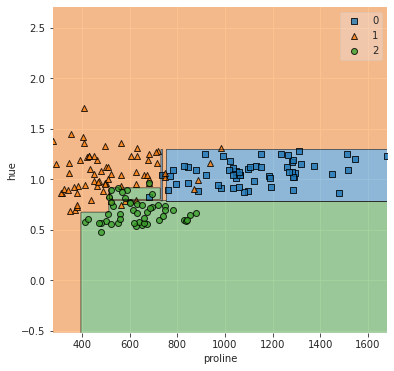

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10)
gbc.fit(X,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X.values, y.values, clf=gbc);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);

# Regression with Gradient Boosted Trees

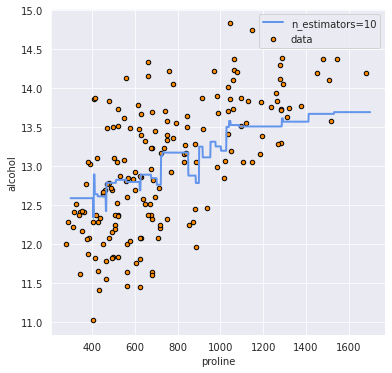

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=10)
gbr.fit(df_wine.proline.values.reshape(-1,1),df_wine.alcohol)
X_test = np.linspace(300,1700,1000)[:,np.newaxis]
y_hat = gbr.predict(X_test)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(df_wine.proline, df_wine.alcohol, s=20, edgecolor="black",
            c="darkorange", label="data")
ax.plot(X_test, y_hat, color="cornflowerblue",
         label="n_estimators=10", linewidth=2)
ax.set_xlabel('proline'); ax.set_ylabel('alcohol'); plt.legend();

# Stacking
<br>

<div align="center"><img src="images/modelstacking.png" width="900px"></div>

<font size=5>From https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/</font>

# Stacking with mlxtend for Classification

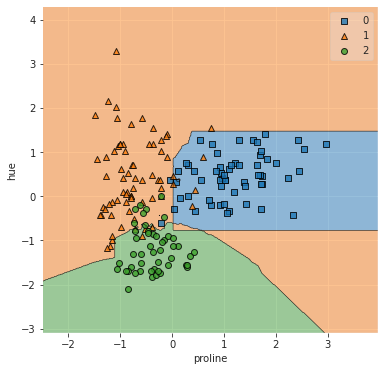

In [20]:
from mlxtend.classifier import StackingClassifier

ensemble = [LogisticRegression(max_iter=1000),
            DecisionTreeClassifier(max_depth=3),
            KNeighborsClassifier(n_neighbors=3)]

stc = StackingClassifier(ensemble,LogisticRegression())
stc.fit(X_zscore,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X_zscore.values, y.values, clf=stc);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);

# Stacking with mlxtend for Regression

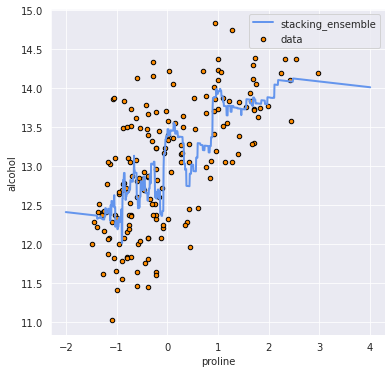

In [21]:
from mlxtend.regressor import StackingRegressor

ensemble = [LinearRegression(),
            DecisionTreeRegressor(max_depth=3),
            KNeighborsRegressor(n_neighbors=6)]

stackr = StackingRegressor(ensemble,LinearRegression())
stackr.fit(X_zscore.proline.values.reshape(-1,1),df_wine.alcohol)
X_test = np.linspace(-2,4,1000)[:,np.newaxis]
y_hat = stackr.predict(X_test)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(X_zscore.proline.values.reshape(-1,1), df_wine.alcohol, s=20, edgecolor="black",
            c="darkorange", label="data")
ax.plot(X_test, y_hat, color="cornflowerblue",
         label="stacking_ensemble", linewidth=2)
ax.set_xlabel('proline'); ax.set_ylabel('alcohol');
plt.legend();


<br>
<br>

# <center>Review of Models</center>
<br>
<br>

# Model Review: Simple/Multiple Linear Regression

- Use for: Regression
- Pros:
 - fast to train
 - interpretable coefficients
- Cons:
 - assumes linear relationship
 - depends on removing colinear features
 <br>
 <br>
 
 
<div align="center"><img src="images/simple_linear_regression.png" width="400px"></div>

from PML

# Model Review: Logistic Regression
    
- Use for: Classification
- Pros:
 - fast to train
 - interpretable coefficients (log odds)
- Cons:
 - assumes linear boundary
 - depends on removing colinear features
<br>
<br>
 
<div align="center"><img src="images/logistic_regression.png" width="400px"></div>

from PML

# Model Review: Support Vector Machine (SVM)

- Use for: Classification and Regression

- Pros:
 - fast to evaluate
 - can use kernel trick to learn non-linear functions
- Cons:
 - slow to train
 - can fail on very large datasets
<br>
<br>

<div align="center"><img src="images/which_hyperplane.png" width="400px"></div>

 

# Model Review: k Nearest Neighbor (kNN)
    
- Use for: Classification or Regression
- Pros:
 - fast to train
 - non-linear boundary
- Cons:
 - potentially slow to predict
 - curse of dimensionality
<br>
<br>

<div align="center"><img src="images/knn_classifier.png" width="400px"></div>

From PML

# Model Review: Decision Tree

- Use for: Classification or Regression
- Pros:
 - very interpretable
 - quick to predict
 - can handle numeric and categorical variables without transformation
- Cons:
 - tendency to overfit (learn training set too well, more next class!)
<br>
<br>

<div align="center"><img src="images/decisiontree_smallexample.png" width="400px"></div>

From PML

# Model Review: Random Forest (Ensemble via Bagging)

- Use for: Classification or Regression
- Pros:
 - less likely to overfit than decision tree
 - quick to train (through parallelization, quick to predict
- Cons:
 - less interpretible, though still possible
<br>
<br>

<div align="center"><img src="images/Architecture-of-the-random-forest-model.png" width="400px"></div>

<font size=4>From https://www.researchgate.net/publication/301638643_Electromyographic_Patterns_during_Golf_Swing_Activation_Sequence_Profiling_and_Prediction_of_Shot_Effectiveness</font>

# Model Review: Gradient Boosted Trees (Ensemble via Boosting)

- Use for: Classification or Regression

- Pros:
 - pays more attention to difficult decision regions
 - quick to predict
 - tends to work well on difficult tasks
- Cons:
 - slow to train (parallelization not possible)
 - less interpretible, though still possible
<br>
<br>

<div align="center"><img src="images/boosting.png" width="400px"></div>

From PML

# Model Review: Ensemble via Stacking
    
- Use for: Classification (or Regression)

- Pros:
 - combines benefits of multiple learning types
 - easy to implement
 - tends to win competitions
- Cons:
 - difficult to interpret
 - training/prediction time depends on component models
<br>
<br>

<div align="center"><img src="images/modelstacking.png" width="400px"></div>

<font size=5>From https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/</font>

<br>
<br>

# <center>Questions?</center>
<br>
<br>